# 第三次实验实验报告
计算机系 计15 2021010803 郭高旭
## 实验目的
1. 掌握计算拉格朗日,分段线性,三次样条三种插值的方法,改变节点的数目,对三种插值结果进行初步分析.
2. 掌握梯形公式,辛普森公式进行数值积分
3. 使用插值和积分解决实际问题

## 第2题

### 算法设计
我选择了不同的x用来生成测试用节点,具体如下
```python
# 定义数据集
datasets = {
    "Original x": np.array([0, 1, 4, 9, 16]),
    "Reversed x": np.array([16, 9, 4, 1, 0]),
    "Random x": np.array([9, 1, 16, 4, 0]),
    "Random2 x": np.array([16, 1, 4, 9, 0]),
    "First 4 x": np.array([0, 1, 4, 9]),
}
```
我希望通过这样的数据集来测试课本中三个插值方法对不同顺序或不同数目给出的节点的插值结果的影响.
算法上我简单地对每个数据集进行三种插值方法的插值,并且求出每个插值方法的误差.代码和结果如下所示

### 代码实现与结果


In [22]:
import numpy as np
from scipy.interpolate import interp1d


def cubic_spline(x, y, z):
    f = interp1d(x, y, kind="cubic")
    return f(z)


def linear(x, y, z):
    f = interp1d(x, y, kind="linear")
    return f(z)


def lagrange(x, y, z):
    n = len(x)
    res = 0
    for i in range(n):
        t = 1
        for j in range(n):
            if j != i:
                t *= (z - x[j]) / (x[i] - x[j])
        res += y[i] * t
    return res


f = lambda x: x**0.5

# 定义数据集
datasets = {
    "Original x": np.array([0, 1, 4, 9, 16]),
    "Reversed x": np.array([16, 9, 4, 1, 0]),
    "Random x": np.array([9, 1, 16, 4, 0]),
    "Random2 x": np.array([16, 1, 4, 9, 0]),
    "First 4 x": np.array([0, 1, 4, 9]),
}

z = 5

# 迭代测试每个数据集和插值函数
for method in [cubic_spline, linear, lagrange]:
    print(f"Testing {method.__name__}:")
    print("-" * 20)

    for name, x_data in datasets.items():
        interpolated_value = method(x_data, f(x_data), z)
        error = abs(interpolated_value - f(z))
        print(f"{name}: {interpolated_value}, Error: {error}")

    print("\n")

Testing cubic_spline:
--------------------
Original x: 2.1633089133089136, Error: 0.07275906419087619
Reversed x: 2.1633089133089136, Error: 0.07275906419087619
Random x: 2.1633089133089136, Error: 0.07275906419087619
Random2 x: 2.1633089133089136, Error: 0.07275906419087619
First 4 x: 1.9999999999999998, Error: 0.23606797749979003


Testing linear:
--------------------
Original x: 2.2, Error: 0.03606797749978963
Reversed x: 2.2, Error: 0.03606797749978963
Random x: 2.2, Error: 0.03606797749978963
Random2 x: 2.2, Error: 0.03606797749978963
First 4 x: 2.2, Error: 0.03606797749978963


Testing lagrange:
--------------------
Original x: 2.079365079365079, Error: 0.15670289813471072
Reversed x: 2.0793650793650795, Error: 0.15670289813471028
Random x: 2.079365079365079, Error: 0.15670289813471072
Random2 x: 2.079365079365079, Error: 0.15670289813471072
First 4 x: 2.0, Error: 0.2360679774997898




### 结果分析
- 对于Lagrange和三次样条插值,在给定的数据产生的结果中,除了First 4 x的结果稍微差一点,其他的结果都是一样的
- 对于分段线性插值,结果都是一样的.

### 结论

- 对于Lagrange和三次样条插值,不同的节点顺序对插值结果的影响不大,但是节点数的减少会使得插值结果的误差增大
- 对于分段线性插值,在待求点为5时,只要两侧节点4和9不变,那一段的插值函数是不变的,因此节点顺序和节点数的变化都无影响

## 第10题
### 问题分析
求y的坐标是一个插值问题,而且机翼应该比较平滑,所以这里选择三次样条插值.应该对机翼上下部分构造两个函数分别插值.
求面积是一个数值积分问题,这里选择辛普森公式进行数值积分.
### 模型建立
对于机翼面积的积分,使用$\int_{a}^{b}(y_1(x)-y_2(x))dx$的形式,其中f(x)是三次样条插值函数,使用辛普森公式进行数值积分.
### 算法设计
- 读取数据
- 对数据进行三次样条插值
- 使用辛普森公式进行数值积分
- 输出结果
### 代码实现与结果

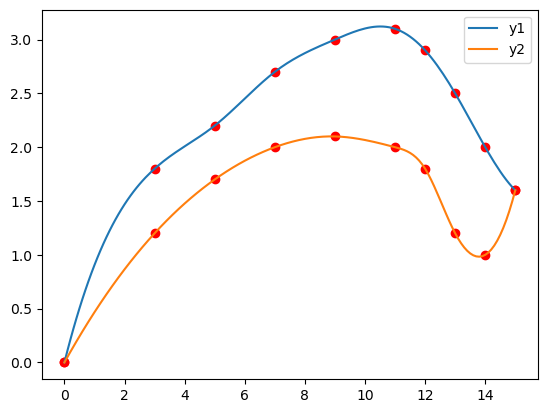

面积: 11.346015851506367


In [23]:
from scipy.interpolate import CubicSpline
from scipy.integrate import simpson
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(precision=5)
x = np.array([0, 3, 5, 7, 9, 11, 12, 13, 14, 15])
y1 = np.array([0, 1.8, 2.2, 2.7, 3.0, 3.1, 2.9, 2.5, 2.0, 1.6])
y2 = np.array([0, 1.2, 1.7, 2.0, 2.1, 2.0, 1.8, 1.2, 1.0, 1.6])

step=0.1
x_new = np.arange(0, 15.1, step)
y1_new = CubicSpline(x, y1)(x_new)
y2_new = CubicSpline(x, y2)(x_new)

plt.plot(x_new, y1_new, label='y1')
plt.plot(x_new, y2_new, label='y2')
plt.scatter(x, y1, color='red')
plt.scatter(x, y2, color='red')
plt.legend()
plt.show()

print("面积:", simpson(y1_new - y2_new, x_new))

### 结果分析与结论
根据插值图像与原始数据的散点图比较,发现比较好地拟合了原始数据,并且根据数值积分的结果,得到了机翼的面积.
可以改进的地方在于,可以使用更多的数据点来进行插值,这样可以得到更加精确的结果.
### 结果的实际意义
这个模型可以用来计算机翼的面积和辅助机翼制造,这对于飞机的设计和制造是非常重要的.

## 第12题

### 问题分析
由于给出数据是离散的,所以需要进行插值,这里选择三次样条插值.给出的是每一分钟的车流量,所以需要对每一分钟进行插值,并且求出每一分钟的车流量,然后求和,得到总车流量.
### 模型建立
对于车流量的插值,使用三次样条插值,然后对每一分钟的车流量进行求和.公式如下
$$
\sum_{i=0:00}^{24:00}f(x_i)
$$
注意应该将时间转换为分钟,然后进行插值,求和,而且0:00和24:00只取1次,这里选择取0:00的数据.
### 算法设计
- 读取数据,将时间转换为分钟
- 对数据进行三次样条插值
- 对每一分钟的车流量进行求和
- 输出结果
### 代码实现与结果


In [24]:
from scipy.interpolate import CubicSpline
import numpy as np

x = np.array([0, 2, 4, 5, 6, 7, 8, 9, 10.5, 11.5, 12.5, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24]) * 60.0
y = np.array([2, 2, 0, 2, 5, 8, 25, 12, 5, 10, 12, 7, 9, 28, 22, 10, 9, 11, 8, 9, 3])

x_new = np.arange(0, 24 * 60, 1)
y_new = CubicSpline(x, y)(x_new)

print("总车流量:", y_new.sum())

总车流量: 12667.984957226472


### 结果分析与结论
总车流量大概为12668辆,这个结果比较符合直观,因为车流量是一个逐渐增大,然后逐渐减小的过程,所以总车流量应该是一个比较大的数.
### 结果的实际意义
这个模型可以用来计算一天的车流量,这对于交通规划和交通管理是非常重要的.